In [1]:
from utils import load_models, load_state_dicts, divergence_detection, load_data

import alu_dataset
import pickle
import torch

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from L1_regularization.L1RegularizationNet import L1RegularizationNet
from magnitude_pruning.MagnitudePruning import MagnitudePruningNet
from soft_thresholding.SoftThresholdNet import SoftThresholdNet
from dynamic_sparse_reparameterization.DynamicSparseReparameterizationNet import DynamicSparseReparameterizationNet
from dense_net.DenseNet import DenseNet

from tabulate import tabulate

/Users/emilhaugstvedt/mambaforge/envs/sparse/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [3]:
fig_size = set_size(600, 1)

In [4]:
# Load data
dataset = "alu" # alu or duffing

# Load train and val data as dataloaders
train_loader, val_loader, test_loader = load_data(f"data/{dataset}")

# Load test data sets
with open("data/alu/test_data.pickle", "rb") as f:
    test_data = pickle.load(f)
    
dt = train_loader.dataset.DT

test_data = alu_dataset.Dataset_alu(test_data, dt)

y_std = test_loader.dataset.y_std
y_mean = test_loader.dataset.y_mean
x_std = test_loader.dataset.x_std
x_mean = test_loader.dataset.x_mean

## Divergence plots for dense models

In [364]:
path = "models/alu/soft_thresholding/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
soft_thresholding_models = load_models(path, n_models=10)

path = "models/alu/L1_regularization/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
L1_regularization_models = load_models(path, n_models=10)

path = "models/alu/dense_net/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
dense_models = load_models(path, n_models=10)

path = "models/alu/magnitude_pruning/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
magnitude_pruning_models = load_models(path, n_models=10)

path = "models/alu/DSR/0.5/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
dynamic_sparse_reparameterization_models = load_models(path, n_models=10)

In [365]:
test_lengths = [100 * i for i in range(1, 51)]

In [366]:
models = soft_thresholding_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

soft_threshold_divergence_dict = divergence_dict
soft_threshold_RFMSE_dict = RFMSE_dict
print(f"Divergence for some steps: {soft_threshold_divergence_dict}")

KeyboardInterrupt: 

In [ ]:
models = L1_regularization_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

L1_divergence_dict = divergence_dict
L1_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {L1_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 1, 400: 1, 500: 2, 600: 2, 700: 2, 800: 2, 900: 2, 1000: 3, 1100: 3, 1200: 3, 1300: 3, 1400: 3, 1500: 4, 1600: 5, 1700: 6, 1800: 7, 1900: 7, 2000: 7, 2100: 7, 2200: 7, 2300: 7, 2400: 7, 2500: 7, 2600: 7, 2700: 7, 2800: 7, 2900: 7, 3000: 7, 3100: 8, 3200: 8, 3300: 8, 3400: 9, 3500: 9, 3600: 10, 3700: 11, 3800: 11, 3900: 13, 4000: 13, 4100: 14, 4200: 15, 4300: 19, 4400: 19, 4500: 20, 4600: 20, 4700: 21, 4800: 21, 4900: 22, 5000: 25}


In [ ]:
models = dynamic_sparse_reparameterization_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

DSR_divergence_dict = divergence_dict
DSR_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {DSR_divergence_dict}")

Divergence dictionary for all models: {100: 15, 200: 40, 300: 83, 400: 120, 500: 171, 600: 220, 700: 248, 800: 279, 900: 301, 1000: 318, 1100: 330, 1200: 343, 1300: 351, 1400: 355, 1500: 357, 1600: 361, 1700: 366, 1800: 368, 1900: 371, 2000: 374, 2100: 374, 2200: 375, 2300: 376, 2400: 378, 2500: 378, 2600: 381, 2700: 381, 2800: 381, 2900: 384, 3000: 385, 3100: 387, 3200: 390, 3300: 390, 3400: 390, 3500: 393, 3600: 393, 3700: 393, 3800: 393, 3900: 393, 4000: 396, 4100: 398, 4200: 398, 4300: 398, 4400: 399, 4500: 399, 4600: 400, 4700: 400, 4800: 400, 4900: 400, 5000: 400}


In [ ]:
models = magnitude_pruning_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

magnitude_pruning_divergence_dict = divergence_dict
magnitude_pruning_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {magnitude_pruning_divergence_dict}")

Divergence dictionary for all models: {100: 1, 200: 23, 300: 49, 400: 66, 500: 85, 600: 97, 700: 104, 800: 112, 900: 115, 1000: 122, 1100: 126, 1200: 130, 1300: 137, 1400: 140, 1500: 143, 1600: 147, 1700: 153, 1800: 163, 1900: 164, 2000: 170, 2100: 176, 2200: 187, 2300: 191, 2400: 198, 2500: 200, 2600: 200, 2700: 200, 2800: 203, 2900: 208, 3000: 213, 3100: 215, 3200: 218, 3300: 224, 3400: 228, 3500: 232, 3600: 236, 3700: 240, 3800: 249, 3900: 256, 4000: 259, 4100: 264, 4200: 267, 4300: 268, 4400: 273, 4500: 278, 4600: 280, 4700: 282, 4800: 284, 4900: 285, 5000: 287}


In [ ]:
models = dense_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

dense_divergence_dict = divergence_dict
dense_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {dense_divergence_dict}")

NameError: name 'dense_models' is not defined

In [ ]:
results_divergence = {
    "Soft thresholding": soft_threshold_divergence_dict,
    "L1": L1_divergence_dict,
    "DSR": DSR_divergence_dict,
    "Magnitude pruning": magnitude_pruning_divergence_dict,
    "Dense": dense_divergence_dict
}

results_RFMSE = {
    "Soft thresholding": soft_threshold_RFMSE_dict,
    "L1": L1_RFMSE_dict,
    "DSR": DSR_RFMSE_dict,
    "Magnitude pruning": magnitude_pruning_RFMSE_dict,
    "Dense": dense_RFMSE_dict
}

with open("results/normal/results_divergence.pickle", "wb") as f:
    pickle.dump(results_divergence, f)

with open("results/normal/results_RFMSE.pickle", "wb") as f:
    pickle.dump(results_RFMSE, f)

In [98]:
with open("results/normal/results_divergence.pickle", "rb") as f:
    results_divergence = pickle.load(f)

L1_divergence_dict = results_divergence["L1"]
DSR_divergence_dict = results_divergence["DSR"]
magnitude_pruning_divergence_dict = results_divergence["Magnitude pruning"]
dense_divergence_dict = results_divergence["Dense"]
soft_threshold_divergence_dict = results_divergence["Soft thresholding"]

plot_lengths = [100, 1000, 2500, 5000]

soft_threshold_divergence_list = [soft_threshold_divergence_dict[length] for length in plot_lengths]
L1_divergence_list = [L1_divergence_dict[length] for length in plot_lengths]
DSR_divergence_list = [DSR_divergence_dict[length] for length in plot_lengths]
magnitude_pruning_divergence_list = [magnitude_pruning_divergence_dict[length] for length in plot_lengths]
dense_divergence_list = [dense_divergence_dict[length] for length in plot_lengths]

n_tests = len(test_data.data) * 10

soft_thershold_divergence_percentage = [soft_threshold_divergence / n_tests * 100 for soft_threshold_divergence in soft_threshold_divergence_list]
L1_divergence_percentage = [L1_divergence / n_tests * 100 for L1_divergence in L1_divergence_list]
DSR_divergence_percentage = [DSR_divergence / n_tests * 100 for DSR_divergence in DSR_divergence_list]
magnitude_pruning_divergence_percentage = [magnitude_pruning_divergence / n_tests * 100 for magnitude_pruning_divergence in magnitude_pruning_divergence_list]
dense_divergence_percentage = [dense_divergence / n_tests * 100 for dense_divergence in dense_divergence_list]

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/2916943919.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/2916943919.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], fontsize=fs_ax, **csfont)


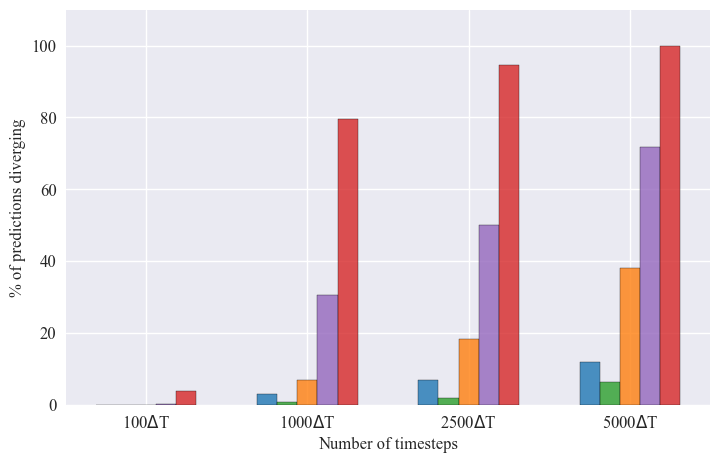

In [99]:
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 10, 16, 22]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

fig, ax= plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    ax.bar(x[i] - 1.5, dense_divergence_percentage[i], width=0.75, color=colors[0], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0.75, L1_divergence_percentage[i], width=0.75, color=colors[1], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0, soft_thershold_divergence_percentage[i], width=0.75, color=colors[2], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 0.75, magnitude_pruning_divergence_percentage[i], width=0.75, color=colors[3], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 1.5, DSR_divergence_percentage[i], width=0.75, color=colors[4], alpha=alpha, edgecolor="black")

csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("% of predictions diverging", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax, **csfont)
ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], fontsize=fs_ax, **csfont)
ax.set_ylim(0, 110)

plt.savefig("figures/divergence_detection_normal.pdf", bbox_inches="tight")

In [49]:
names = ["Dense", "L1", "Soft thresholding", "Magnitude pruning", "DSR"]
percentages = [dense_divergence_percentage, L1_divergence_percentage, soft_thershold_divergence_percentage, magnitude_pruning_divergence_percentage, DSR_divergence_percentage]

# Create tabulate table
table = []
for i in range(len(percentages)):
    row = [names[i]]
    for percentage in percentages[i]:
        row.append(f"{percentage:.2f}%")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
    ))

\begin{tabular}{lllll}
\hline
 Model:            & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense             & 0.00\%            & 3.00\%             & 6.75\%             & 12.00\%            \\
 L1                & 0.00\%            & 0.75\%             & 1.75\%             & 6.25\%             \\
 Soft thresholding & 0.00\%            & 6.75\%             & 18.25\%            & 38.00\%            \\
 Magnitude pruning & 0.25\%            & 30.50\%            & 50.00\%            & 71.75\%            \\
 DSR               & 3.75\%            & 79.50\%            & 94.50\%            & 100.00\%           \\
\hline
\end{tabular}


## Divergence plot for models regularized with L1

In [ ]:
path = "models/alu/soft_thresholding/l1/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
L1_soft_thresholding_models = load_models(path, n_models=10)

path = "models/alu/L1_regularization/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
L1_regularization_models = load_models(path, n_models=10)

path = "models/alu/magnitude_pruning/l1/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
L1_magnitude_pruning_models = load_models(path, n_models=10)

path = "models/alu/dynamic_sparse_reparameterization/l1/model" # dense, soft_thresholding, L1-regularization, dynamic_sparse_reparameterization, magnitude_pruning
L1_DSR_models = load_models(path, n_models=10)

In [ ]:
test_lengths = [100 * i for i in range(1, 51)]

In [ ]:
models = L1_soft_thresholding_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

L1_soft_threshold_divergence_dict = divergence_dict
L1_soft_threshold_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {L1_soft_threshold_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 1, 300: 2, 400: 3, 500: 6, 600: 10, 700: 16, 800: 23, 900: 27, 1000: 34, 1100: 35, 1200: 40, 1300: 45, 1400: 50, 1500: 54, 1600: 58, 1700: 61, 1800: 67, 1900: 69, 2000: 80, 2100: 84, 2200: 88, 2300: 94, 2400: 99, 2500: 110, 2600: 118, 2700: 120, 2800: 123, 2900: 131, 3000: 140, 3100: 144, 3200: 151, 3300: 154, 3400: 158, 3500: 161, 3600: 163, 3700: 166, 3800: 170, 3900: 173, 4000: 175, 4100: 182, 4200: 187, 4300: 189, 4400: 193, 4500: 195, 4600: 196, 4700: 198, 4800: 199, 4900: 204, 5000: 208}


In [ ]:
models = L1_magnitude_pruning_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

L1_magnitude_pruning_divergence_dict = divergence_dict
L1_magnitude_pruning_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {L1_magnitude_pruning_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 0, 400: 0, 500: 1, 600: 1, 700: 2, 800: 3, 900: 3, 1000: 3, 1100: 3, 1200: 3, 1300: 6, 1400: 6, 1500: 6, 1600: 6, 1700: 9, 1800: 10, 1900: 11, 2000: 12, 2100: 13, 2200: 15, 2300: 15, 2400: 15, 2500: 15, 2600: 18, 2700: 19, 2800: 20, 2900: 21, 3000: 21, 3100: 25, 3200: 25, 3300: 26, 3400: 26, 3500: 28, 3600: 30, 3700: 32, 3800: 34, 3900: 36, 4000: 38, 4100: 39, 4200: 40, 4300: 42, 4400: 42, 4500: 42, 4600: 42, 4700: 42, 4800: 42, 4900: 42, 5000: 44}


In [ ]:
models = L1_DSR_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

L1_DSR_divergence_dict = divergence_dict
L1_DSR_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {L1_DSR_divergence_dict}")            

Divergence dictionary for all models: {100: 257, 200: 329, 300: 352, 400: 368, 500: 377, 600: 387, 700: 391, 800: 392, 900: 394, 1000: 397, 1100: 399, 1200: 399, 1300: 399, 1400: 399, 1500: 399, 1600: 399, 1700: 399, 1800: 399, 1900: 399, 2000: 399, 2100: 400, 2200: 400, 2300: 400, 2400: 400, 2500: 400, 2600: 400, 2700: 400, 2800: 400, 2900: 400, 3000: 400, 3100: 400, 3200: 400, 3300: 400, 3400: 400, 3500: 400, 3600: 400, 3700: 400, 3800: 400, 3900: 400, 4000: 400, 4100: 400, 4200: 400, 4300: 400, 4400: 400, 4500: 400, 4600: 400, 4700: 400, 4800: 400, 4900: 400, 5000: 400}


In [ ]:
models = L1_regularization_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

L1_divergence_dict = divergence_dict
L1_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {L1_divergence_dict}")  

Divergence dictionary for all models: {100: 0, 200: 0, 300: 1, 400: 1, 500: 2, 600: 2, 700: 2, 800: 2, 900: 2, 1000: 3, 1100: 3, 1200: 3, 1300: 3, 1400: 3, 1500: 4, 1600: 5, 1700: 6, 1800: 7, 1900: 7, 2000: 7, 2100: 7, 2200: 7, 2300: 7, 2400: 7, 2500: 7, 2600: 7, 2700: 7, 2800: 7, 2900: 7, 3000: 7, 3100: 8, 3200: 8, 3300: 8, 3400: 9, 3500: 9, 3600: 10, 3700: 11, 3800: 11, 3900: 13, 4000: 13, 4100: 14, 4200: 15, 4300: 19, 4400: 19, 4500: 20, 4600: 20, 4700: 21, 4800: 21, 4900: 22, 5000: 25}


In [ ]:
results_divergence = {
    "Soft thresholding": L1_soft_threshold_divergence_dict,
    "Magnitude pruning": L1_magnitude_pruning_divergence_dict,
    "DSR": L1_DSR_divergence_dict,
    "L1": L1_divergence_dict,
}

results_RFMSE = {
    "Soft thresholding": L1_soft_threshold_RFMSE_dict,
    "Magnitude pruning": L1_magnitude_pruning_RFMSE_dict,
    "DSR": L1_DSR_RFMSE_dict,
    "L1": L1_RFMSE_dict,
}

with open("results/L1/results_divergence.pickle", "wb") as f:
    pickle.dump(results_divergence, f)

with open("results/L1/results_RFMSE.pickle", "wb") as f:
    pickle.dump(results_RFMSE, f)

NameError: name 'L1_soft_threshold_divergence_dict' is not defined

In [100]:
with open("results/L1/results_divergence.pickle", "rb") as f:
    results_divergence = pickle.load(f)

with open("results/normal/results_divergence.pickle", "rb") as f:
    results_divergence_normal = pickle.load(f)

L1_soft_threshold_divergence_dict = results_divergence["Soft thresholding"]
L1_magnitude_pruning_divergence_dict = results_divergence["Magnitude pruning"]
L1_DSR_divergence_dict = results_divergence["DSR"]
L1_divergence_dict = results_divergence["L1"]
dense_divergence_dict = results_divergence_normal["Dense"]

plot_lengths = [100, 1000, 2500, 5000]

L1_soft_threshold_divergence_list = [L1_soft_threshold_divergence_dict[length] for length in plot_lengths]
L1_divergence_list = [L1_divergence_dict[length] for length in plot_lengths]
L1_DSR_divergence_list = [L1_DSR_divergence_dict[length] for length in plot_lengths]
L1_magnitude_pruning_divergence_list = [L1_magnitude_pruning_divergence_dict[length] for length in plot_lengths]
dense_divergence_list = [dense_divergence_dict[length] for length in plot_lengths]

n_tests = len(test_data.data) * 10

L1_soft_thershold_divergence_percentage = [L1_soft_threshold_divergence / n_tests * 100 for L1_soft_threshold_divergence in L1_soft_threshold_divergence_list]
L1_divergence_percentage = [L1_divergence / n_tests * 100 for L1_divergence in L1_divergence_list]
L1_DSR_divergence_percentage = [L1_DSR_divergence / n_tests * 100 for L1_DSR_divergence in L1_DSR_divergence_list]
L1_magnitude_pruning_divergence_percentage = [L1_magnitude_pruning_divergence / n_tests * 100 for L1_magnitude_pruning_divergence in L1_magnitude_pruning_divergence_list]
dense_divergence_percentage = [dense_divergence / n_tests * 100 for dense_divergence in dense_divergence_list]

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/812035217.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/812035217.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], fontsize=fs_ax, **csfont)


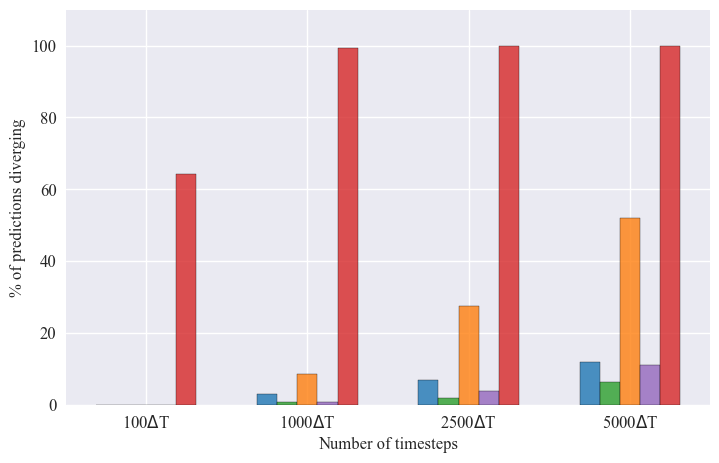

In [101]:
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 10, 16, 22]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

fig, ax= plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    ax.bar(x[i] - 1.5, dense_divergence_percentage[i], width=0.75, color=colors[0], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0.75, L1_divergence_percentage[i], width=0.75, color=colors[1], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0, L1_soft_thershold_divergence_percentage[i], width=0.75, color=colors[2], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 0.75, L1_magnitude_pruning_divergence_percentage[i], width=0.75, color=colors[3], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 1.5, L1_DSR_divergence_percentage[i], width=0.75, color=colors[4], alpha=alpha, edgecolor="black")

csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("% of predictions diverging", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax, **csfont)
ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], fontsize=fs_ax, **csfont)
ax.set_ylim(0, 110)
#ax.legend(["Dense", "L1", "Soft Thresholding", "Magnitude Pruning", "DSR"], loc="upper left")

plt.savefig("figures/divergence_detection_L1.pdf", bbox_inches="tight")

In [10]:
names = ["Dense", "L1", "Soft thresholding", "Magnitude pruning", "DSR"]
percentages = [dense_divergence_percentage, L1_divergence_percentage, L1_soft_thershold_divergence_percentage, L1_magnitude_pruning_divergence_percentage, L1_DSR_divergence_percentage]

# Create tabulate table
table = []
for i in range(len(percentages)):
    row = [names[i]]
    for percentage in percentages[i]:
        row.append(f"{percentage:.2f}%")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
    ))

\begin{tabular}{lllll}
\hline
 Model:            & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense             & 0.00\%            & 3.00\%             & 6.75\%             & 12.00\%            \\
 L1                & 0.00\%            & 0.75\%             & 1.75\%             & 6.25\%             \\
 Soft thresholding & 0.00\%            & 8.50\%             & 27.50\%            & 52.00\%            \\
 Magnitude pruning & 0.00\%            & 0.75\%             & 3.75\%             & 11.00\%            \\
 DSR               & 64.25\%           & 99.25\%            & 100.00\%           & 100.00\%           \\
\hline
\end{tabular}


## Divergence plots for SWA models

In [ ]:
path = "models/alu/L1_regularization/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 25, 25, 25, 25, 8]
swa_l1_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(L1RegularizationNet(layers))
    model.load_state_dict(state_dict)
    swa_l1_models.append(model)

path = "models/alu/soft_thresholding/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 25, 25, 25, 25, 8]
swa_l1_soft_thresholding_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(SoftThresholdNet(layers, s_init=0))
    model.load_state_dict(state_dict)
    swa_l1_soft_thresholding_models.append(model)

path = "models/alu/dense_net/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 25, 25, 25, 25, 8]
swa_l1_dense_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(DenseNet(layers))
    model.load_state_dict(state_dict)
    swa_l1_dense_models.append(model)

path = "models/alu/magnitude_pruning/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 64, 64, 64, 64, 8]
swa_l1_magnitude_pruning_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(MagnitudePruningNet(layers))
    model.load_state_dict(state_dict)
    swa_l1_magnitude_pruning_models.append(model)

path = "models/alu/dynamic_sparse_reparameterization/0.1/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 128, 128, 128, 128, 8]
swa_l1_DSR_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(DynamicSparseReparameterizationNet(layers, H=0, sparsity=0, Np=0, fractional_tolerence=0))
    model.load_state_dict(state_dict)
    swa_l1_DSR_models.append(model)

/Users/emilhaugstvedt/Desktop/NTNU/master/sparsity/dynamic_sparse_reparameterization/DynamicSparseReparameterizationNet.py:16: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  kaming_weights = nn.init.kaiming_normal(torch.Tensor(self.weight.shape))


In [ ]:
test_lengths = [100 * i for i in range(1, 51)]

In [ ]:
models = swa_l1_soft_thresholding_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

swa_l1_soft_thershold_divergence_dict = divergence_dict
swa_l1_soft_thershold_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {swa_l1_soft_thershold_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 2, 400: 2, 500: 4, 600: 4, 700: 8, 800: 12, 900: 15, 1000: 23, 1100: 28, 1200: 32, 1300: 37, 1400: 42, 1500: 47, 1600: 51, 1700: 58, 1800: 65, 1900: 73, 2000: 75, 2100: 78, 2200: 83, 2300: 84, 2400: 90, 2500: 95, 2600: 98, 2700: 103, 2800: 112, 2900: 119, 3000: 126, 3100: 128, 3200: 132, 3300: 134, 3400: 137, 3500: 142, 3600: 147, 3700: 153, 3800: 160, 3900: 166, 4000: 167, 4100: 170, 4200: 173, 4300: 174, 4400: 179, 4500: 182, 4600: 188, 4700: 192, 4800: 200, 4900: 206, 5000: 209}


In [ ]:
models = swa_l1_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

swa_l1_divergence_dict = divergence_dict
swa_l1_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {swa_l1_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 1, 400: 1, 500: 1, 600: 1, 700: 1, 800: 1, 900: 1, 1000: 1, 1100: 2, 1200: 2, 1300: 2, 1400: 2, 1500: 2, 1600: 2, 1700: 2, 1800: 3, 1900: 3, 2000: 4, 2100: 4, 2200: 5, 2300: 5, 2400: 8, 2500: 8, 2600: 8, 2700: 10, 2800: 12, 2900: 12, 3000: 12, 3100: 13, 3200: 14, 3300: 14, 3400: 14, 3500: 15, 3600: 15, 3700: 15, 3800: 15, 3900: 15, 4000: 18, 4100: 19, 4200: 19, 4300: 20, 4400: 20, 4500: 21, 4600: 21, 4700: 23, 4800: 23, 4900: 24, 5000: 25}


In [ ]:
models = swa_l1_DSR_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

swa_l1_DSR_divergence_dict = divergence_dict
swa_l1_DSR_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {swa_l1_DSR_divergence_dict}")

Divergence dictionary for all models: {100: 2, 200: 9, 300: 34, 400: 71, 500: 113, 600: 150, 700: 170, 800: 185, 900: 207, 1000: 218, 1100: 237, 1200: 249, 1300: 258, 1400: 263, 1500: 274, 1600: 282, 1700: 291, 1800: 301, 1900: 308, 2000: 311, 2100: 314, 2200: 318, 2300: 322, 2400: 326, 2500: 328, 2600: 332, 2700: 340, 2800: 344, 2900: 348, 3000: 351, 3100: 354, 3200: 357, 3300: 359, 3400: 360, 3500: 363, 3600: 365, 3700: 367, 3800: 369, 3900: 369, 4000: 370, 4100: 371, 4200: 372, 4300: 374, 4400: 375, 4500: 377, 4600: 377, 4700: 378, 4800: 379, 4900: 381, 5000: 381}


In [ ]:
models = swa_l1_magnitude_pruning_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

swa_l1_magnitude_pruning_divergence_dict = divergence_dict
swa_l1_magnitude_pruning_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {swa_l1_magnitude_pruning_divergence_dict}")

Divergence dictionary for all models: {100: 1, 200: 2, 300: 15, 400: 36, 500: 47, 600: 63, 700: 72, 800: 84, 900: 102, 1000: 110, 1100: 124, 1200: 131, 1300: 137, 1400: 148, 1500: 153, 1600: 160, 1700: 162, 1800: 167, 1900: 171, 2000: 178, 2100: 186, 2200: 195, 2300: 196, 2400: 201, 2500: 211, 2600: 214, 2700: 219, 2800: 222, 2900: 224, 3000: 232, 3100: 234, 3200: 238, 3300: 241, 3400: 243, 3500: 247, 3600: 253, 3700: 259, 3800: 262, 3900: 263, 4000: 267, 4100: 271, 4200: 277, 4300: 280, 4400: 284, 4500: 286, 4600: 289, 4700: 292, 4800: 293, 4900: 299, 5000: 301}


In [ ]:
models = swa_l1_dense_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

swa_l1_dense_divergence_dict = divergence_dict
swa_l1_dense_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {swa_l1_dense_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 1, 400: 3, 500: 8, 600: 10, 700: 14, 800: 15, 900: 16, 1000: 17, 1100: 18, 1200: 19, 1300: 19, 1400: 19, 1500: 20, 1600: 20, 1700: 22, 1800: 25, 1900: 26, 2000: 28, 2100: 32, 2200: 33, 2300: 37, 2400: 38, 2500: 39, 2600: 40, 2700: 41, 2800: 42, 2900: 43, 3000: 45, 3100: 46, 3200: 46, 3300: 46, 3400: 47, 3500: 47, 3600: 47, 3700: 49, 3800: 50, 3900: 51, 4000: 54, 4100: 57, 4200: 58, 4300: 58, 4400: 59, 4500: 59, 4600: 60, 4700: 61, 4800: 61, 4900: 61, 5000: 62}


In [ ]:
results_divergence = {
    "Soft thresholding": swa_l1_soft_thershold_divergence_dict,
    "L1": swa_l1_divergence_dict,
    "DSR": swa_l1_DSR_divergence_dict,
    "Magnitude pruning": swa_l1_magnitude_pruning_divergence_dict,
    "Dense": swa_l1_dense_divergence_dict,
}

results_RFMSE = {
    "Soft thresholding": swa_l1_soft_thershold_RFMSE_dict,
    "L1": swa_l1_RFMSE_dict,
    "DSR": swa_l1_DSR_RFMSE_dict,
    "Magnitude pruning": swa_l1_magnitude_pruning_RFMSE_dict,
    "Dense": swa_l1_dense_RFMSE_dict,
}

with open("results/SWA/results_divergence.pickle", "wb") as f:
    pickle.dump(results_divergence, f)

with open("results/SWA/results_RFMSE.pickle", "wb") as f:
    pickle.dump(results_RFMSE, f)

In [20]:
with open("results/SWA/results_divergence.pickle", "rb") as f:
    results_divergence = pickle.load(f)

swa_l1_divergence_dict = results_divergence["L1"]
swa_soft_thershold_divergence_dict = results_divergence["Soft thresholding"]
swa_DSR_divergence_dict = results_divergence["DSR"]
swa_magnitude_pruning_divergence_dict = results_divergence["Magnitude pruning"]
swa_dense_divergence_dict = results_divergence["Dense"]

plot_lengths = [100, 1000, 2500, 5000]

swa_soft_threshold_divergence_list = [swa_soft_thershold_divergence_dict[length] for length in plot_lengths]
swa_l1_divergence_list = [swa_l1_divergence_dict[length] for length in plot_lengths]
swa_DSR_divergence_list = [swa_DSR_divergence_dict[length] for length in plot_lengths]
swa_magnitude_pruning_divergence_list = [swa_magnitude_pruning_divergence_dict[length] for length in plot_lengths]
swa_dense_divergence_list = [swa_dense_divergence_dict[length] for length in plot_lengths]

n_tests = len(test_data.data) * 10

swa_soft_thershold_divergence_percentage = [swa_l1_soft_thershold_divergence / n_tests * 100 for swa_l1_soft_thershold_divergence in swa_soft_threshold_divergence_list]
swa_l1_divergence_percentage = [swa_l1_divergence / n_tests * 100 for swa_l1_divergence in swa_l1_divergence_list]
swa_DSR_divergence_percentage = [swa_l1_DSR_divergence / n_tests * 100 for swa_l1_DSR_divergence in swa_DSR_divergence_list]
swa_magnitude_pruning_divergence_percentage = [swa_l1_magnitude_pruning_divergence / n_tests * 100 for swa_l1_magnitude_pruning_divergence in swa_magnitude_pruning_divergence_list]
swa_dense_divergence_percentage = [swa_l1_dense_divergence / n_tests * 100 for swa_l1_dense_divergence in swa_dense_divergence_list]


/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/223705609.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/223705609.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], **csfont)


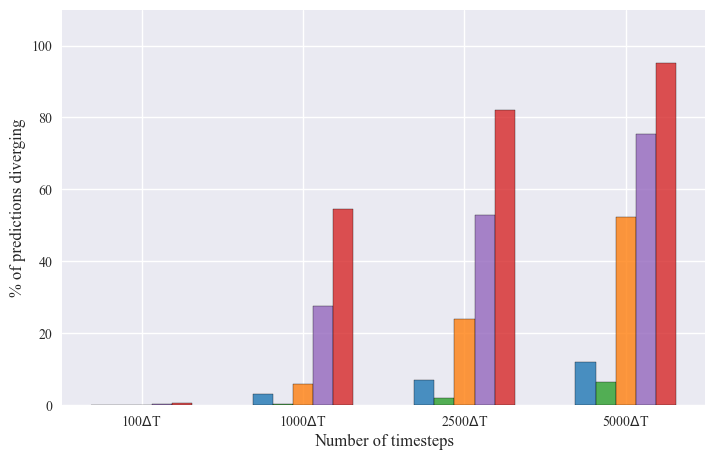

In [21]:
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 10, 16, 22]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

fig, ax= plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    ax.bar(x[i] - 1.5, dense_divergence_percentage[i], width=0.75, color=colors[0], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0.75, swa_l1_divergence_percentage[i], width=0.75, color=colors[1], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0, swa_soft_thershold_divergence_percentage[i], width=0.75, color=colors[2], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 0.75, swa_magnitude_pruning_divergence_percentage[i], width=0.75, color=colors[3], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 1.5, swa_DSR_divergence_percentage[i], width=0.75, color=colors[4], alpha=alpha, edgecolor="black")

csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("% of predictions diverging", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, **csfont)
ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], **csfont)
ax.set_ylim(0, 110)
#ax.legend(["Dense", "L1", "Soft Thresholding", "Magnitude Pruning", "DSR"], loc="upper left")

plt.savefig("figures/divergence_detection_swa.pdf", bbox_inches="tight")

In [22]:
names = ["Dense", "L1", "Soft thresholding", "Magnitude pruning", "DSR"]
percentages = [
    dense_divergence_percentage, 
    swa_l1_divergence_percentage, 
    swa_soft_thershold_divergence_percentage,
    swa_magnitude_pruning_divergence_percentage,
    swa_DSR_divergence_percentage
    ]

# Create tabulate table
table = []
for i in range(len(percentages)):
    row = [names[i]]
    for percentage in percentages[i]:
        row.append(f"{percentage:.2f}%")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
        )
    )

\begin{tabular}{lllll}
\hline
 Model:            & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense             & 0.00\%            & 3.00\%             & 6.75\%             & 12.00\%            \\
 L1                & 0.00\%            & 0.25\%             & 2.00\%             & 6.25\%             \\
 Soft thresholding & 0.00\%            & 5.75\%             & 23.75\%            & 52.25\%            \\
 Magnitude pruning & 0.25\%            & 27.50\%            & 52.75\%            & 75.25\%            \\
 DSR               & 0.50\%            & 54.50\%            & 82.00\%            & 95.25\%            \\
\hline
\end{tabular}


## Divergence plot for SWA and L1

In [171]:
path = "models/alu/L1_regularization/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 25, 25, 25, 25, 8]
swa_l1_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(L1RegularizationNet(layers))
    model.load_state_dict(state_dict)
    swa_l1_models.append(model)

path = "models/alu/soft_thresholding/L1/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 25, 25, 25, 25, 8]
l1_swa_l1_soft_thresholding_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(SoftThresholdNet(layers, s_init=0))
    model.load_state_dict(state_dict)
    l1_swa_l1_soft_thresholding_models.append(model)

path = "models/alu/magnitude_pruning/L1/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 64, 64, 64, 64, 8]
l1_swa_l1_magnitude_pruning_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(MagnitudePruningNet(layers))
    model.load_state_dict(state_dict)
    l1_swa_l1_magnitude_pruning_models.append(model)

path = "models/alu/DSR/l1/swa_l1_model"
state_dicts = load_state_dicts(path, n_models=10)
layers = [13, 128, 128, 128, 128, 8]
l1_swa_l1_DSR_models = []
for state_dict in state_dicts:
    model = torch.optim.swa_l1_utils.AveragedModel(DynamicSparseReparameterizationNet(layers, H=0, sparsity=0, Np=0, fractional_tolerence=0))
    model.load_state_dict(state_dict)
    l1_swa_l1_DSR_models.append(model)

In [172]:
test_lengths = [100 * i for i in range(1, 51)]

In [ ]:
models = l1_swa_l1_soft_thresholding_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

l1_swa_l1_soft_thershold_divergence_dict = divergence_dict
l1_swa_l1_soft_thershold_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {l1_swa_l1_soft_thershold_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 0, 400: 0, 500: 2, 600: 3, 700: 8, 800: 10, 900: 12, 1000: 17, 1100: 19, 1200: 22, 1300: 25, 1400: 32, 1500: 34, 1600: 38, 1700: 44, 1800: 50, 1900: 55, 2000: 58, 2100: 64, 2200: 73, 2300: 81, 2400: 83, 2500: 85, 2600: 87, 2700: 91, 2800: 95, 2900: 97, 3000: 103, 3100: 106, 3200: 108, 3300: 109, 3400: 114, 3500: 123, 3600: 128, 3700: 132, 3800: 134, 3900: 139, 4000: 141, 4100: 145, 4200: 148, 4300: 150, 4400: 156, 4500: 162, 4600: 170, 4700: 173, 4800: 175, 4900: 176, 5000: 178}


In [ ]:
models = swa_l1_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

swa_l1_divergence_dict = divergence_dict
swa_l1_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {swa_l1_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 1, 400: 1, 500: 1, 600: 1, 700: 1, 800: 1, 900: 1, 1000: 1, 1100: 2, 1200: 2, 1300: 2, 1400: 2, 1500: 2, 1600: 2, 1700: 2, 1800: 3, 1900: 3, 2000: 4, 2100: 4, 2200: 5, 2300: 5, 2400: 8, 2500: 8, 2600: 8, 2700: 10, 2800: 12, 2900: 12, 3000: 12, 3100: 13, 3200: 14, 3300: 14, 3400: 14, 3500: 15, 3600: 15, 3700: 15, 3800: 15, 3900: 15, 4000: 18, 4100: 19, 4200: 19, 4300: 20, 4400: 20, 4500: 21, 4600: 21, 4700: 23, 4800: 23, 4900: 24, 5000: 25}


In [174]:
models = l1_swa_l1_DSR_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

l1_swa_l1_DSR_divergence_dict = divergence_dict
l1_swa_l1_DSR_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {l1_swa_l1_DSR_divergence_dict}")

Divergence dictionary for all models: {100: 252, 200: 311, 300: 343, 400: 358, 500: 376, 600: 385, 700: 389, 800: 396, 900: 398, 1000: 399, 1100: 399, 1200: 400, 1300: 400, 1400: 400, 1500: 400, 1600: 400, 1700: 400, 1800: 400, 1900: 400, 2000: 400, 2100: 400, 2200: 400, 2300: 400, 2400: 400, 2500: 400, 2600: 400, 2700: 400, 2800: 400, 2900: 400, 3000: 400, 3100: 400, 3200: 400, 3300: 400, 3400: 400, 3500: 400, 3600: 400, 3700: 400, 3800: 400, 3900: 400, 4000: 400, 4100: 400, 4200: 400, 4300: 400, 4400: 400, 4500: 400, 4600: 400, 4700: 400, 4800: 400, 4900: 400, 5000: 400}


In [ ]:
models = l1_swa_l1_magnitude_pruning_models

RFMSE_dict, divergence_dict = divergence_detection(models, test_data, test_lengths)

l1_swa_l1_magnitude_pruning_divergence_dict = divergence_dict
l1_swa_l1_magnitude_pruning_RFMSE_dict = RFMSE_dict
print(f"Divergence dictionary for all models: {l1_swa_l1_magnitude_pruning_divergence_dict}")

Divergence dictionary for all models: {100: 0, 200: 0, 300: 0, 400: 1, 500: 1, 600: 1, 700: 1, 800: 2, 900: 2, 1000: 2, 1100: 2, 1200: 3, 1300: 4, 1400: 4, 1500: 6, 1600: 9, 1700: 9, 1800: 10, 1900: 10, 2000: 11, 2100: 13, 2200: 14, 2300: 16, 2400: 16, 2500: 16, 2600: 16, 2700: 17, 2800: 17, 2900: 21, 3000: 22, 3100: 23, 3200: 23, 3300: 25, 3400: 25, 3500: 26, 3600: 28, 3700: 31, 3800: 33, 3900: 34, 4000: 36, 4100: 39, 4200: 39, 4300: 40, 4400: 42, 4500: 45, 4600: 45, 4700: 46, 4800: 48, 4900: 52, 5000: 54}


In [183]:
results_divergence = {
    "Soft thresholding": l1_swa_l1_soft_thershold_divergence_dict,
    "L1": swa_l1_divergence_dict,
    "DSR": l1_swa_l1_DSR_divergence_dict,
    "Magnitude pruning": l1_swa_l1_magnitude_pruning_divergence_dict,
}

results_RFMSE = {
    "Soft thresholding": l1_swa_l1_soft_thershold_RFMSE_dict,
    "L1": swa_l1_RFMSE_dict,
    "DSR": l1_swa_l1_DSR_RFMSE_dict,
    "Magnitude pruning": l1_swa_l1_magnitude_pruning_RFMSE_dict,
}

with open("results/SWA + L1/results_divergence.pickle", "wb") as f:
    pickle.dump(results_divergence, f)

with open("results/SWA + L1/results_RFMSE.pickle", "wb") as f:
    pickle.dump(results_RFMSE, f)

In [13]:
with open("results/SWA + L1/results_divergence.pickle", "rb") as f:
    results_divergence = pickle.load(f)

with open("results/normal/results_divergence.pickle", "rb") as f:
    normal_results_divergence = pickle.load(f)

dense_divergence_dict = normal_results_divergence["Dense"]
l1_swa_divergence_dict = results_divergence["L1"]
l1_swa_DSR_divergence_dict = results_divergence["DSR"]
l1_swa_magnitude_pruning_divergence_dict = results_divergence["Magnitude pruning"]
l1_swa_soft_thershold_divergence_dict = results_divergence["Soft thresholding"]

plot_lengths = [100, 1000, 2500, 5000]

dense_divergence_list = [dense_divergence_dict[length] for length in plot_lengths]
l1_swa_soft_threshold_divergence_list = [l1_swa_soft_thershold_divergence_dict[length] for length in plot_lengths]
l1_swa_divergence_list = [l1_swa_divergence_dict[length] for length in plot_lengths]
l1_swa_DSR_divergence_list = [l1_swa_DSR_divergence_dict[length] for length in plot_lengths]
l1_swa_magnitude_pruning_divergence_list = [l1_swa_magnitude_pruning_divergence_dict[length] for length in plot_lengths]

n_tests = len(test_data.data) * 10

dense_divergence_percentage = [dense_divergence / n_tests * 100 for dense_divergence in dense_divergence_list]
l1_swa_soft_thershold_divergence_percentage = [l1_swa_soft_thershold_divergence / n_tests * 100 for l1_swa_soft_thershold_divergence in l1_swa_soft_threshold_divergence_list]
l1_swa_divergence_percentage = [l1_swa_l1_divergence / n_tests * 100 for l1_swa_l1_divergence in l1_swa_divergence_list]
l1_swa_DSR_divergence_percentage = [l1_swa_l1_DSR_divergence / n_tests * 100 for l1_swa_l1_DSR_divergence in l1_swa_l1_DSR_divergence_dict]
l1_swa_magnitude_pruning_divergence_percentage = [l1_swa_l1_magnitude_pruning_divergence / n_tests * 100 for l1_swa_l1_magnitude_pruning_divergence in l1_swa_magnitude_pruning_divergence_list]


/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/1663686854.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/1663686854.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], **csfont)


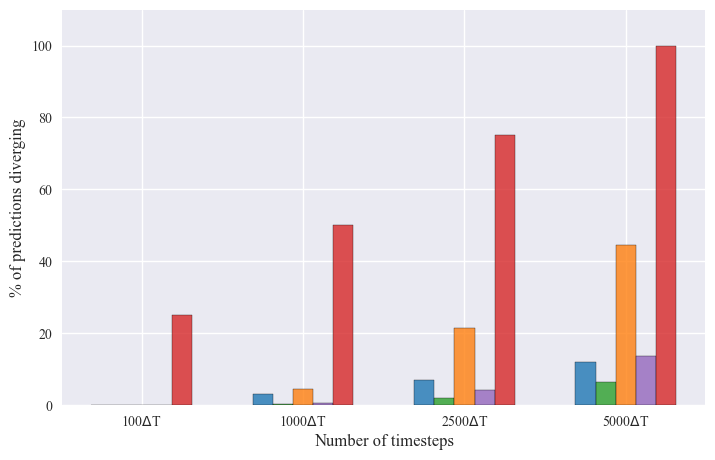

In [16]:
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 10, 16, 22]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

fig, ax= plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    ax.bar(x[i] - 1.5, dense_divergence_percentage[i], width=0.75, color=colors[0], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0.75, l1_swa_divergence_percentage[i], width=0.75, color=colors[1], alpha=alpha, edgecolor="black")
    ax.bar(x[i] - 0, l1_swa_soft_thershold_divergence_percentage[i], width=0.75, color=colors[2], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 0.75, l1_swa_magnitude_pruning_divergence_percentage[i], width=0.75, color=colors[3], alpha=alpha, edgecolor="black")
    ax.bar(x[i] + 1.5, l1_swa_DSR_divergence_percentage[i], width=0.75, color=colors[4], alpha=alpha, edgecolor="black")

csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("% of predictions diverging", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, **csfont)
ax.set_yticklabels([f"{int(y)}" for y in ax.get_yticks()], **csfont)
ax.set_ylim(0, 110)
#ax.legend(["Dense", "L1", "Soft Thresholding", "Magnitude Pruning", "DSR"], loc="upper left")

plt.savefig("figures/divergence_detection_L1_swa.pdf", bbox_inches="tight")

In [18]:
names = ["Dense + SWA", "L1 + SWA", "Soft thresholding + L1 + SWA", "Magnitude pruning + L1 + SWA", "DSR + L1 + SWA"]
percentages = [
    dense_divergence_percentage, 
    l1_swa_divergence_percentage, 
    l1_swa_soft_thershold_divergence_percentage,
    l1_swa_magnitude_pruning_divergence_percentage,
    l1_swa_DSR_divergence_percentage
    ]

# Create tabulate table
table = []
for i in range(len(percentages)):
    row = [names[i]]
    for percentage in percentages[i]:
        row.append(f"{percentage:.2f}%")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
        )
    )

\begin{tabular}{lllllllllllllllllllllllllllllllllllllllllllllllllll}
\hline
 Model:                       & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense + SWA                  & 0.00\%            & 3.00\%             & 6.75\%             & 12.00\%            \\
 L1 + SWA                     & 0.00\%            & 0.25\%             & 2.00\%             & 6.25\%             \\
 Soft thresholding + L1 + SWA & 0.00\%            & 4.25\%             & 21.25\%            & 44.50\%            \\
 Magnitude pruning + L1 + SWA & 0.00\%            & 0.50\%             & 4.00\%             & 13.50\%            \\
 DSR + L1 + SWA               & 25.00\%           & 50.00\%            & 75.00\%            & 100.00\%           \\
\hline
\end{tabular}


# Compairsion for different models using different techniques

In [ ]:
with open("results/normal/results_divergence.pickle", "rb") as f:
    normal_results = pickle.load(f)

with open("results/L1/results_divergence.pickle", "rb") as f:
    L1_results = pickle.load(f)

with open("results/SWA/results_divergence.pickle", "rb") as f:
    swa_l1_results = pickle.load(f)

with open("results/SWA + L1/results_divergence.pickle", "rb") as f:
    L1_swa_l1_results = pickle.load(f)

In [ ]:
model_type = "Soft thresholding"

nomal_divergence = normal_results[model_type]
L1_divergence = L1_results[model_type]
swa_l1_divergence = swa_l1_results[model_type]
L1_swa_l1_divergence = L1_swa_l1_results[model_type]

In [ ]:
plot_lengths = [500, 1000, 2500, 5000]

normal_divergence_list= [nomal_divergence[length] for length in plot_lengths]
L1_divergence_list = [L1_divergence[length] for length in plot_lengths]
swa_l1_divergence_list = [swa_l1_divergence[length] for length in plot_lengths]
L1_swa_l1_divergence_list = [L1_swa_l1_divergence[length] for length in plot_lengths]

In [ ]:
n_tests = len(test_data.data) * len(swa_l1_soft_thresholding_models)

normal_divergence_percentage = [normal_divergence / n_tests * 100 for normal_divergence in normal_divergence_list]
L1_divergence_percentage = [L1_divergence / n_tests * 100 for L1_divergence in L1_divergence_list]
swa_l1_divergence_percentage = [swa_l1_divergence / n_tests * 100 for swa_l1_divergence in swa_l1_divergence_list]
L1_swa_l1_divergence_percentage = [L1_swa_l1_divergence / n_tests * 100 for L1_swa_l1_divergence in L1_swa_l1_divergence_list]

NameError: name 'test_data' is not defined

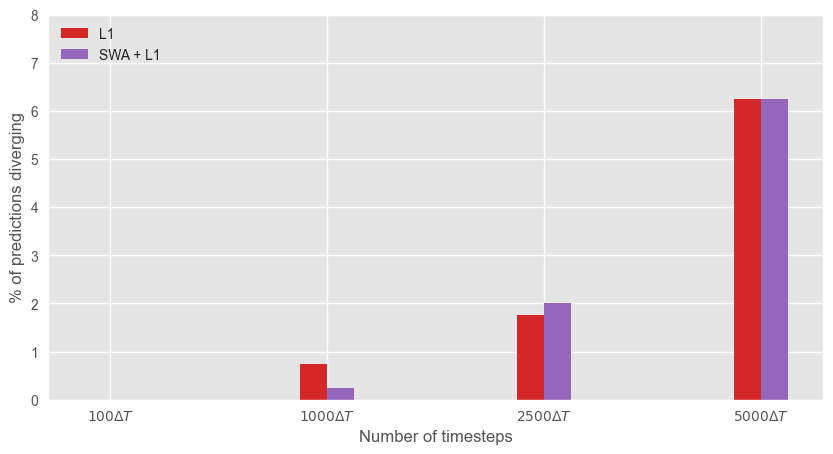

In [ ]:
x_labels = [f"${length} \Delta T$" for length in plot_lengths]
x = [4, 10, 16, 22]

colors = ['#FF7F0E', '#2CA02C', '#D62728', '#9467BD']

plt.style.use("ggplot")

fig, ax= plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    ax.bar(x[i] - 1.125, normal_divergence_percentage[i], width=0.75, color=colors[0])
    ax.bar(x[i] - 0.375, L1_divergence_percentage[i], width=0.75, color=colors[1])
    ax.bar(x[i] + 0.375, swa_l1_divergence_percentage[i], width=0.75, color=colors[2])
    ax.bar(x[i] + 1.125, L1_swa_l1_divergence_percentage[i], width=0.75, color=colors[3])


ax.set_ylabel("% of predictions diverging")
ax.set_xlabel("Number of timesteps")
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(0, 110)
ax.legend(["dense", "L1", "SWA", "SWA + L1"], loc="upper left")

plt.savefig(f"figures/{model_type}/divergence_detection.pdf", bbox_inches="tight")

## Violin plot for RFMSE

In [81]:
with open("results/normal/results_RFMSE.pickle", "rb") as f:
    RFMSE_results = pickle.load(f)

L1_RFMSE_dict = RFMSE_results["L1"]
soft_threshold_RFMSE_dict = RFMSE_results["Soft thresholding"]
magnitude_pruning_RFMSE_dict = RFMSE_results["Magnitude pruning"]
DSR_RFMSE_dict = RFMSE_results["DSR"]
dense_RFMSE_dict = RFMSE_results["Dense"]

### Settings for plotting steps ###

plot_lengths = [100, 1000, 2500, 5000]

### ---------------------------- ###

L1_RFMSE_list = []
soft_threshold_RFMSE_list = []
magnitude_pruning_RFMSE_list = []
dense_RFMSE_list = []
DSR_RFMSE_list = []
for length in plot_lengths:
    L1_RFMSE_list.append([L1_RFMSE.detach() for L1_RFMSE in L1_RFMSE_dict[length]])
    soft_threshold_RFMSE_list.append([soft_threshold_RFMSE.detach() for soft_threshold_RFMSE in soft_threshold_RFMSE_dict[length]])
    magnitude_pruning_RFMSE_list.append([magnitude_pruning_RFMSE.detach() for magnitude_pruning_RFMSE in magnitude_pruning_RFMSE_dict[length]])
    dense_RFMSE_list.append([dense_RFMSE.detach() for dense_RFMSE in dense_RFMSE_dict[length]])
    DSR_RFMSE_list.append([DSR_RFMSE.detach() for DSR_RFMSE in DSR_RFMSE_dict[length]])

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/1088297234.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/1088297234.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)


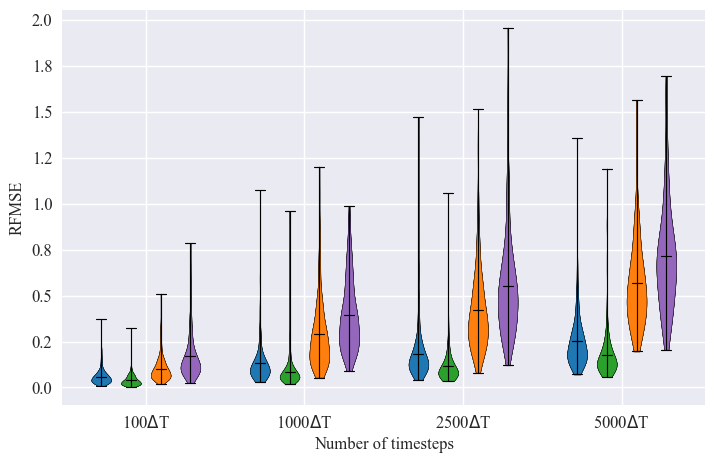

In [106]:
### Settings for plot ###
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 12, 20, 28]

log = False

ylim = [2 * 1e-3, 0.3 * 1e1] if log else [0, 2.1]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

### Violin plot ###
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def set_color(violin, color):
    for pc in violin["bodies"]:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(alpha)

violins = []
fig, ax = plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    violins.append(ax.violinplot(dense_RFMSE_list, [x_ - 2.25 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(L1_RFMSE_list, [x_ - 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(soft_threshold_RFMSE_list, [x_ + 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(magnitude_pruning_RFMSE_list, [x_ + 2.25 for x_ in x], showmeans=True, showextrema=True,  widths=1))

for v, violin in enumerate(violins):
    violin["cbars"].set_color("black")
    violin["cbars"].set_linewidth(0.75)

    violin["cmins"].set_color("black")
    violin["cmins"].set_linewidth(0.75)

    violin["cmaxes"].set_color("black")
    violin["cmaxes"].set_linewidth(0.75)

    violin["cmeans"].set_color("black")
    violin["cmeans"].set_linewidth(0.75)

    for body in violin["bodies"]:
        body.set_alpha(alpha)
        body.set_facecolor(colors[v % 4])
        body.set_edgecolor("black")

    if v == 4:
        [add_label(violin, label) for violin, label in zip(violins, ["Dense", "L1", "Soft thresholding", "Magnitude pruning"])]


csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("RFMSE", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax,**csfont)
ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)

if log:
    ax.set_yscale("log")

#ax.legend(*zip(*labels), loc="upper left")

plt.savefig("figures/dense/log_violin_plot.pdf" if log else "figures/dense/violin_plot.pdf", bbox_inches="tight")

In [107]:
names = ["Dense", "L1", "Soft thresholding", "Magnitude pruning + SWA", "DSR"]
RFMSE_lists = [dense_RFMSE_list, L1_RFMSE_list, soft_threshold_RFMSE_list, magnitude_pruning_RFMSE_list, DSR_RFMSE_list]

dense_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in dense_RFMSE_list]
L1_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in L1_RFMSE_list]
soft_threshold_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in soft_threshold_RFMSE_list]
magnitude_pruning_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in magnitude_pruning_RFMSE_list]
DSR_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in DSR_RFMSE_list]
stds = [dense_RFMSE_std, L1_RFMSE_std, soft_threshold_RFMSE_std, magnitude_pruning_RFMSE_std, DSR_RFMSE_std]

dense_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in dense_RFMSE_list]
L1_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in L1_RFMSE_list]
soft_threshold_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in soft_threshold_RFMSE_list]
magnitude_pruning_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in magnitude_pruning_RFMSE_list]
DSR_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in DSR_RFMSE_list]
means = [dense_RFMSE_mean, L1_RFMSE_mean, soft_threshold_RFMSE_mean, magnitude_pruning_RFMSE_mean, DSR_RFMSE_mean]

# Create tabulate table
table = []
for i in range(len(stds)):
    row = [names[i]]
    for mean, std in zip(means[i], stds[i]):
        if torch.isnan(std):
            row.append("-")
        else:
            row.append(f"${mean:.2f} \pm {std:.2f}$")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
        )
    ) 

\begin{tabular}{lllll}
\hline
 Model:                  & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense                   & \$0.06 \textbackslash{}pm 0.04\$  & \$0.13 \textbackslash{}pm 0.12\$   & \$0.18 \textbackslash{}pm 0.14\$   & \$0.25 \textbackslash{}pm 0.15\$   \\
 L1                      & \$0.04 \textbackslash{}pm 0.03\$  & \$0.09 \textbackslash{}pm 0.08\$   & \$0.12 \textbackslash{}pm 0.11\$   & \$0.18 \textbackslash{}pm 0.13\$   \\
 Soft thresholding       & \$0.10 \textbackslash{}pm 0.06\$  & \$0.29 \textbackslash{}pm 0.19\$   & \$0.42 \textbackslash{}pm 0.23\$   & \$0.57 \textbackslash{}pm 0.25\$   \\
 Magnitude pruning + SWA & \$0.17 \textbackslash{}pm 0.12\$  & \$0.40 \textbackslash{}pm 0.20\$   & \$0.55 \textbackslash{}pm 0.28\$   & \$0.72 \textbackslash{}pm 0.31\$   \\
 DSR                     & \$0.25 \textbackslash{}pm 0.13\$  & \$0.67 \textbackslash{}pm

## Violin plot L1

In [108]:
with open("results/L1/results_RFMSE.pickle", "rb") as f:
    RFMSE_L1_results = pickle.load(f)

with open("results/normal/results_RFMSE.pickle", "rb") as f:
    RFMSE_normal_results = pickle.load(f)

l1_RFMSE_dict = RFMSE_L1_results["L1"]
l1_soft_threshold_RFMSE_dict = RFMSE_L1_results["Soft thresholding"]
l1_magnitude_pruning_RFMSE_dict = RFMSE_L1_results["Magnitude pruning"]
l1_DSR_RFMSE_dict = RFMSE_L1_results["DSR"]
dense_RFMSE_dict = RFMSE_normal_results["Dense"]

### Settings for plotting steps ###

plot_lengths = [100, 1000, 2500, 5000]

### ---------------------------- ###

l1_RFMSE_list = []
l1_soft_threshold_RFMSE_list = []
l1_magnitude_pruning_RFMSE_list = []
dense_RFMSE_list = []
l1_DSR_RFMSE_list = []
for length in plot_lengths:
    l1_RFMSE_list.append([l1_RFMSE.detach() for l1_RFMSE in l1_RFMSE_dict[length]])
    l1_soft_threshold_RFMSE_list.append([soft_threshold_RFMSE.detach() for soft_threshold_RFMSE in l1_soft_threshold_RFMSE_dict[length]])
    l1_magnitude_pruning_RFMSE_list.append([magnitude_pruning_RFMSE.detach() for magnitude_pruning_RFMSE in l1_magnitude_pruning_RFMSE_dict[length]])
    dense_RFMSE_list.append([dense_RFMSE.detach() for dense_RFMSE in dense_RFMSE_dict[length]])
    l1_DSR_RFMSE_list.append([DSR_RFMSE.detach() for DSR_RFMSE in l1_DSR_RFMSE_dict[length]])

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/3774471596.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/3774471596.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)


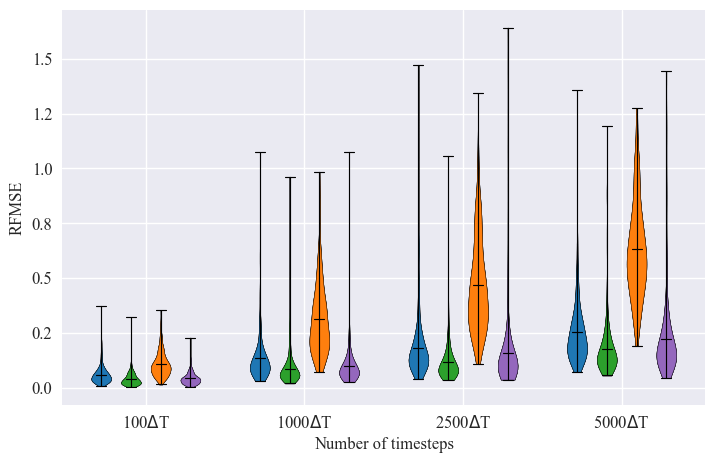

In [109]:
### Settings for plot ###
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 12, 20, 28]

log = False

ylim = [2 * 1e-3, 0.3 * 1e1] if log else [0, 2.1]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

### Violin plot ###
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def set_color(violin, color):
    for pc in violin["bodies"]:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(alpha)

violins = []
fig, ax = plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    violins.append(ax.violinplot(dense_RFMSE_list, [x_ - 2.25 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(l1_RFMSE_list, [x_ - 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(l1_soft_threshold_RFMSE_list, [x_ + 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(l1_magnitude_pruning_RFMSE_list, [x_ + 2.25 for x_ in x], showmeans=True, showextrema=True,  widths=1))
    
for v, violin in enumerate(violins):
    violin["cbars"].set_color("black")
    violin["cbars"].set_linewidth(0.75)

    violin["cmins"].set_color("black")
    violin["cmins"].set_linewidth(0.75)

    violin["cmaxes"].set_color("black")
    violin["cmaxes"].set_linewidth(0.75)

    violin["cmeans"].set_color("black")
    violin["cmeans"].set_linewidth(0.75)

    for body in violin["bodies"]:
        body.set_alpha(alpha)
        body.set_facecolor(colors[v % 4])
        body.set_edgecolor("black")

    if v == 4:
        [add_label(violin, label) for violin, label in zip(violins, ["Dense", "L1", "Soft thresholding", "Magnitude pruning"])]


csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("RFMSE", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax,**csfont)
ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)

if log:
    ax.set_yscale("log")

#ax.legend(*zip(*labels), loc="upper left")

plt.savefig("figures/L1/log_violin_plot.pdf" if log else "figures/L1/violin_plot.pdf", bbox_inches="tight")

In [110]:
names = ["Dense", "L1", "Soft thresholding + L1", "Magnitude pruning + L1", "DSR + L1"]
l1_RFMSE_lists = [dense_RFMSE_list, l1_RFMSE_list, l1_soft_threshold_RFMSE_list, l1_magnitude_pruning_RFMSE_list, l1_DSR_RFMSE_list]

dense_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in dense_RFMSE_list]
l1_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in l1_RFMSE_list]
l1_soft_threshold_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in l1_soft_threshold_RFMSE_list]
l1_magnitude_pruning_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in l1_magnitude_pruning_RFMSE_list]
l1_DSR_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in l1_DSR_RFMSE_list]
l1_stds = [dense_RFMSE_std, l1_RFMSE_std, l1_soft_threshold_RFMSE_std, l1_magnitude_pruning_RFMSE_std, l1_DSR_RFMSE_std]

dense_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in dense_RFMSE_list]
l1_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in l1_RFMSE_list]
l1_soft_threshold_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in l1_soft_threshold_RFMSE_list]
l1_magnitude_pruning_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in l1_magnitude_pruning_RFMSE_list]
l1_DSR_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in l1_DSR_RFMSE_list]
l1_means = [dense_RFMSE_mean, l1_RFMSE_mean, l1_soft_threshold_RFMSE_mean, l1_magnitude_pruning_RFMSE_mean, l1_DSR_RFMSE_mean]

# Create tabulate table
table = []
for i in range(len(l1_stds)):
    row = [names[i]]
    for l1_mean, l1_std in zip(l1_means[i], l1_stds[i]):
        if torch.isnan(l1_std):
            row.append("-")
        else:
            row.append(f"${l1_mean:.2f} \pm {l1_std:.2f}$")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
        )
    ) 

\begin{tabular}{lllll}
\hline
 Model:                 & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense                  & \$0.06 \textbackslash{}pm 0.04\$  & \$0.13 \textbackslash{}pm 0.12\$   & \$0.18 \textbackslash{}pm 0.14\$   & \$0.25 \textbackslash{}pm 0.15\$   \\
 L1                     & \$0.04 \textbackslash{}pm 0.03\$  & \$0.09 \textbackslash{}pm 0.08\$   & \$0.12 \textbackslash{}pm 0.11\$   & \$0.18 \textbackslash{}pm 0.13\$   \\
 Soft thresholding + L1 & \$0.11 \textbackslash{}pm 0.06\$  & \$0.31 \textbackslash{}pm 0.17\$   & \$0.47 \textbackslash{}pm 0.22\$   & \$0.63 \textbackslash{}pm 0.22\$   \\
 Magnitude pruning + L1 & \$0.04 \textbackslash{}pm 0.03\$  & \$0.10 \textbackslash{}pm 0.10\$   & \$0.16 \textbackslash{}pm 0.20\$   & \$0.22 \textbackslash{}pm 0.19\$   \\
 DSR + L1               & \$0.50 \textbackslash{}pm 0.19\$  & \$1.25 \textbackslash{}pm 0.44\

## Violin plot SWA

In [111]:
with open("results/SWA/results_RFMSE.pickle", "rb") as f:
    swa_RFMSE_results = pickle.load(f)

swa_l1_RFMSE_dict = swa_RFMSE_results["L1"]
swa_soft_threshold_RFMSE_dict = swa_RFMSE_results["Soft thresholding"]
swa_magnitude_pruning_RFMSE_dict = swa_RFMSE_results["Magnitude pruning"]
swa_DSR_RFMSE_dict = swa_RFMSE_results["DSR"]
swa_dense_RFMSE_dict = swa_RFMSE_results["Dense"]

### Settings for plotting steps ###

plot_lengths = [100, 1000, 2500, 5000]

### ---------------------------- ###

swa_l1_RFMSE_list = []
swa_soft_threshold_RFMSE_list = []
swa_magnitude_pruning_RFMSE_list = []
swa_dense_RFMSE_list = []
swa_DSR_RFMSE_list = []
for length in plot_lengths:
    swa_l1_RFMSE_list.append([l1_RFMSE.detach() for l1_RFMSE in swa_l1_RFMSE_dict[length]])
    swa_soft_threshold_RFMSE_list.append([soft_threshold_RFMSE.detach() for soft_threshold_RFMSE in swa_soft_threshold_RFMSE_dict[length]])
    swa_magnitude_pruning_RFMSE_list.append([magnitude_pruning_RFMSE.detach() for magnitude_pruning_RFMSE in swa_magnitude_pruning_RFMSE_dict[length]])
    swa_dense_RFMSE_list.append([dense_RFMSE.detach() for dense_RFMSE in swa_dense_RFMSE_dict[length]])
    swa_DSR_RFMSE_list.append([DSR_RFMSE.detach() for DSR_RFMSE in swa_DSR_RFMSE_dict[length]])

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/1276171362.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_8521/1276171362.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)


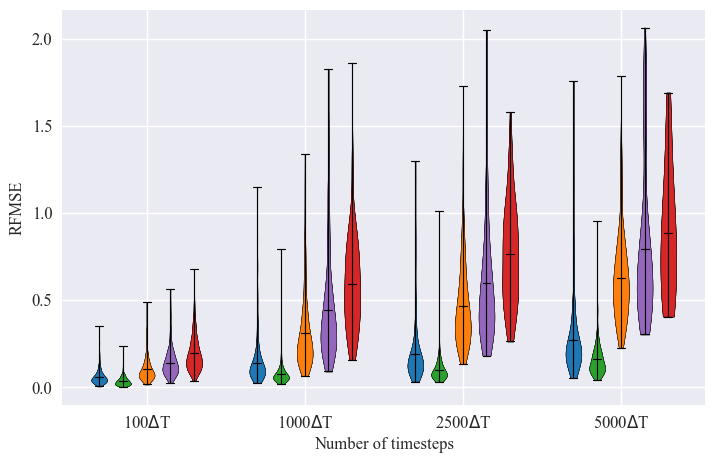

In [112]:
### Settings for plot ###
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 14, 24, 34]

log = False

ylim = [2 * 1e-3, 0.3 * 1e1] if log else [0, 2.1]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

### Violin plot ###
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def set_color(violin, color):
    for pc in violin["bodies"]:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(alpha)

violins = []
fig, ax = plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    violins.append(ax.violinplot(swa_dense_RFMSE_list, [x_ - 3 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(swa_l1_RFMSE_list, [x_ - 1.5 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(swa_soft_threshold_RFMSE_list, [x_ for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(swa_magnitude_pruning_RFMSE_list, [x_ + 1.5 for x_ in x], showmeans=True, showextrema=True,  widths=1))
    violins.append(ax.violinplot(swa_DSR_RFMSE_list, [x_ + 3 for x_ in x], showmeans=True, showextrema=True,  widths=1))

for v, violin in enumerate(violins):
    violin["cbars"].set_color("black")
    violin["cbars"].set_linewidth(0.75)

    violin["cmins"].set_color("black")
    violin["cmins"].set_linewidth(0.75)

    violin["cmaxes"].set_color("black")
    violin["cmaxes"].set_linewidth(0.75)

    violin["cmeans"].set_color("black")
    violin["cmeans"].set_linewidth(0.75)

    for body in violin["bodies"]:
        body.set_alpha(alpha)
        body.set_facecolor(colors[v % 5])
        body.set_edgecolor("black")

    if v == 4:
        [add_label(violin, label) for violin, label in zip(violins, ["Dense", "L1", "Soft thresholding", "Magnitude pruning"])]


csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("RFMSE", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax,**csfont)
ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)

if log:
    ax.set_yscale("log")

#ax.legend(*zip(*labels), loc="upper left")

plt.savefig("figures/SWA/log_violin_plot.pdf" if log else "figures/SWA/violin_plot.pdf", bbox_inches="tight")

In [113]:
names = ["Dense + SWA", "L1 + SWA", "Soft thresholding + SWA", "Magnitude pruning + SWA", "DSR + SWA"]
l1_RFMSE_lists = [swa_dense_RFMSE_list, swa_l1_RFMSE_list, swa_soft_threshold_RFMSE_list, swa_magnitude_pruning_RFMSE_list, swa_DSR_RFMSE_list]

swa_dense_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_dense_RFMSE_list]
swa_l1_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_l1_RFMSE_list]
swa_soft_threshold_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_soft_threshold_RFMSE_list]
swa_magnitude_pruning_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_magnitude_pruning_RFMSE_list]
swa_DSR_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_DSR_RFMSE_list]
swa_stds = [swa_dense_RFMSE_std, swa_l1_RFMSE_std, swa_soft_threshold_RFMSE_std, swa_magnitude_pruning_RFMSE_std, swa_DSR_RFMSE_std]

swa_dense_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_dense_RFMSE_list]
swa_l1_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_l1_RFMSE_list]
swa_soft_threshold_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_soft_threshold_RFMSE_list]
swa_magnitude_pruning_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_magnitude_pruning_RFMSE_list]
swa_DSR_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_DSR_RFMSE_list]
swa_means = [swa_dense_RFMSE_mean, swa_l1_RFMSE_mean, swa_soft_threshold_RFMSE_mean, swa_magnitude_pruning_RFMSE_mean, swa_DSR_RFMSE_mean]

# Create tabulate table
table = []
for i in range(len(swa_stds)):
    row = [names[i]]
    for swa_mean, swa_std in zip(swa_means[i], swa_stds[i]):
        if torch.isnan(swa_std):
            row.append("-")
        else:
            row.append(f"${swa_mean:.2f} \pm {swa_std:.2f}$")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
        )
    ) 

\begin{tabular}{lllll}
\hline
 Model:                  & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense + SWA             & \$0.06 \textbackslash{}pm 0.04\$  & \$0.14 \textbackslash{}pm 0.12\$   & \$0.19 \textbackslash{}pm 0.18\$   & \$0.27 \textbackslash{}pm 0.22\$   \\
 L1 + SWA                & \$0.04 \textbackslash{}pm 0.03\$  & \$0.08 \textbackslash{}pm 0.06\$   & \$0.10 \textbackslash{}pm 0.08\$   & \$0.16 \textbackslash{}pm 0.10\$   \\
 Soft thresholding + SWA & \$0.10 \textbackslash{}pm 0.07\$  & \$0.31 \textbackslash{}pm 0.21\$   & \$0.47 \textbackslash{}pm 0.24\$   & \$0.63 \textbackslash{}pm 0.26\$   \\
 Magnitude pruning + SWA & \$0.14 \textbackslash{}pm 0.08\$  & \$0.44 \textbackslash{}pm 0.30\$   & \$0.60 \textbackslash{}pm 0.37\$   & \$0.79 \textbackslash{}pm 0.45\$   \\
 DSR + SWA               & \$0.20 \textbackslash{}pm 0.11\$  & \$0.60 \textbackslash{}pm

## Violin for SWA and L1

In [24]:
with open("results/SWA + L1/results_RFMSE.pickle", "rb") as f:
    swa_l1_RFMSE_results = pickle.load(f)

with open("results/normal/results_RFMSE.pickle", "rb") as f:
    RFMSE_normal_results = pickle.load(f)

swa_l1_RFMSE_dict = swa_l1_RFMSE_results["L1"]
swa_l1_soft_threshold_RFMSE_dict = swa_l1_RFMSE_results["Soft thresholding"]
swa_l1_magnitude_pruning_RFMSE_dict = swa_l1_RFMSE_results["Magnitude pruning"]
swa_l1_DSR_RFMSE_dict = swa_l1_RFMSE_results["DSR"]
dense_RFMSE_dict = RFMSE_normal_results["Dense"]

### Settings for plotting steps ###

plot_lengths = [100, 1000, 2500, 5000]

### ---------------------------- ###

swa_l1_RFMSE_list = []
swa_l1_soft_threshold_RFMSE_list = []
swa_l1_magnitude_pruning_RFMSE_list = []
dense_RFMSE_list = []
swa_l1_DSR_RFMSE_list = []
for length in plot_lengths:
    swa_l1_RFMSE_list.append([l1_RFMSE.detach() for l1_RFMSE in swa_l1_RFMSE_dict[length]])
    swa_l1_soft_threshold_RFMSE_list.append([soft_threshold_RFMSE.detach() for soft_threshold_RFMSE in swa_l1_soft_threshold_RFMSE_dict[length]])
    swa_l1_magnitude_pruning_RFMSE_list.append([magnitude_pruning_RFMSE.detach() for magnitude_pruning_RFMSE in swa_l1_magnitude_pruning_RFMSE_dict[length]])
    dense_RFMSE_list.append([dense_RFMSE.detach() for dense_RFMSE in dense_RFMSE_dict[length]])
    swa_l1_DSR_RFMSE_list.append([DSR_RFMSE.detach() for DSR_RFMSE in swa_l1_DSR_RFMSE_dict[length]])

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/512981532.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/512981532.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)


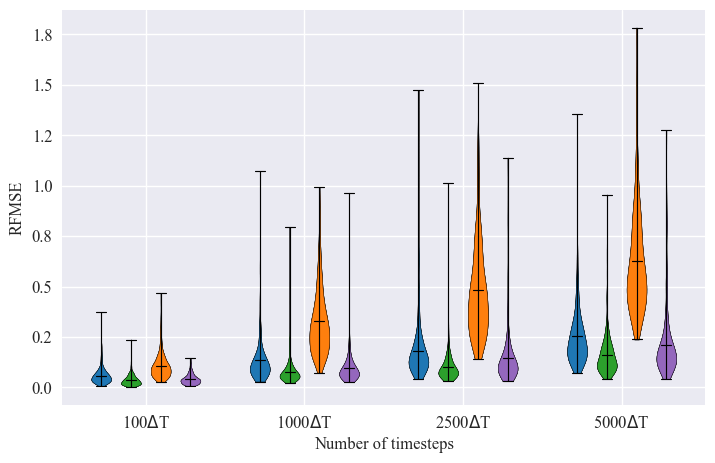

In [25]:
### Settings for plot ###
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 12, 20, 28]

log = False

ylim = [2 * 1e-3, 0.3 * 1e1] if log else [0, 2.1]

colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#9467bd', '#d62728']
alpha = 0.8

plt.style.use("seaborn")

### Violin plot ###
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def set_color(violin, color):
    for pc in violin["bodies"]:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(alpha)

violins = []
fig, ax = plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    violins.append(ax.violinplot(dense_RFMSE_list, [x_ - 2.25 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(swa_l1_RFMSE_list, [x_ - 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(swa_l1_soft_threshold_RFMSE_list, [x_ + 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(swa_l1_magnitude_pruning_RFMSE_list, [x_ + 2.25 for x_ in x], showmeans=True, showextrema=True,  widths=1))

for v, violin in enumerate(violins):
    violin["cbars"].set_color("black")
    violin["cbars"].set_linewidth(0.75)

    violin["cmins"].set_color("black")
    violin["cmins"].set_linewidth(0.75)

    violin["cmaxes"].set_color("black")
    violin["cmaxes"].set_linewidth(0.75)

    violin["cmeans"].set_color("black")
    violin["cmeans"].set_linewidth(0.75)

    for body in violin["bodies"]:
        body.set_alpha(alpha)
        body.set_facecolor(colors[v % 4])
        body.set_edgecolor("black")

    if v == 4:
        [add_label(violin, label) for violin, label in zip(violins, ["Dense", "L1", "Soft thresholding", "Magnitude pruning"])]


csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("RFMSE", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax,**csfont)
ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)

if log:
    ax.set_yscale("log")

#ax.legend(*zip(*labels), loc="upper left")

plt.savefig("figures/SWA + L1/log_violin_plot.pdf" if log else "figures/SWA + L1/violin_plot.pdf", bbox_inches="tight")

In [26]:
names = ["Dense", "L1 + SWA", "Soft thresholding + L1 + SWA", "Magnitude pruning + L1 + SWA", "DSR + L1 + SWA"]
l1_RFMSE_lists = [dense_RFMSE_list, swa_l1_RFMSE_list, swa_l1_soft_threshold_RFMSE_list, swa_l1_magnitude_pruning_RFMSE_list, swa_l1_DSR_RFMSE_list]

dense_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in dense_RFMSE_list]
swa_l1_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_l1_RFMSE_list]
swa_l1_soft_threshold_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_l1_soft_threshold_RFMSE_list]
swa_l1_magnitude_pruning_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_l1_magnitude_pruning_RFMSE_list]
swa_l1_DSR_RFMSE_std = [torch.std(torch.tensor(timestep)) for timestep in swa_l1_DSR_RFMSE_list]
swa_l1_stds = [dense_RFMSE_std, swa_l1_RFMSE_std, swa_l1_soft_threshold_RFMSE_std, swa_l1_magnitude_pruning_RFMSE_std, swa_l1_DSR_RFMSE_std]

dense_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in dense_RFMSE_list]
swa_l1_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_l1_RFMSE_list]
swa_l1_soft_threshold_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_l1_soft_threshold_RFMSE_list]
swa_l1_magnitude_pruning_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_l1_magnitude_pruning_RFMSE_list]
swa_l1_DSR_RFMSE_mean = [torch.mean(torch.tensor(timestep)) for timestep in swa_l1_DSR_RFMSE_list]
swa_l1_means = [dense_RFMSE_mean, swa_l1_RFMSE_mean, swa_l1_soft_threshold_RFMSE_mean, swa_l1_magnitude_pruning_RFMSE_mean, swa_l1_DSR_RFMSE_mean]

# Create tabulate table
table = []
for i in range(len(swa_l1_stds)):
    row = [names[i]]
    for swa_l1_mean, swa_l1_std in zip(swa_l1_means[i], swa_l1_stds[i]):
        if torch.isnan(swa_l1_std):
            row.append("-")
        else:
            row.append(f"${swa_l1_mean:.2f} \pm {swa_l1_std:.2f}$")
    table.append(row)

print(tabulate(
    table, 
    headers=["Model:", "$500 \Delta T$", "$1000 \Delta T$", "$2500 \Delta T$", "$5000 \Delta T$"],
    tablefmt="latex",
        )
    ) 

\begin{tabular}{lllll}
\hline
 Model:                       & \$500 \textbackslash{}Delta T\$   & \$1000 \textbackslash{}Delta T\$   & \$2500 \textbackslash{}Delta T\$   & \$5000 \textbackslash{}Delta T\$   \\
\hline
 Dense                        & \$0.06 \textbackslash{}pm 0.04\$  & \$0.13 \textbackslash{}pm 0.12\$   & \$0.18 \textbackslash{}pm 0.14\$   & \$0.25 \textbackslash{}pm 0.15\$   \\
 L1 + SWA                     & \$0.04 \textbackslash{}pm 0.03\$  & \$0.08 \textbackslash{}pm 0.06\$   & \$0.10 \textbackslash{}pm 0.08\$   & \$0.16 \textbackslash{}pm 0.10\$   \\
 Soft thresholding + L1 + SWA & \$0.11 \textbackslash{}pm 0.06\$  & \$0.33 \textbackslash{}pm 0.17\$   & \$0.48 \textbackslash{}pm 0.24\$   & \$0.63 \textbackslash{}pm 0.26\$   \\
 Magnitude pruning + L1 + SWA & \$0.04 \textbackslash{}pm 0.02\$  & \$0.10 \textbackslash{}pm 0.08\$   & \$0.14 \textbackslash{}pm 0.14\$   & \$0.21 \textbackslash{}pm 0.16\$   \\
 DSR + L1 + SWA               & \$0.53 \textbackslash{}pm 0.19\

## Comparetive violin plots

In [32]:
with open("results/L1/results_RFMSE.pickle", "rb") as f:
    L1_RFMSE_results = pickle.load(f)

with open("results/SWA + L1/results_RFMSE.pickle", "rb") as f:
    L1_swa_l1_RFMSE_results = pickle.load(f)

L1_RFMSE_dict = L1_RFMSE_results["L1"]
L1_magnitude_pruning_RFMSE_dict = L1_RFMSE_results["Magnitude pruning"]
L1_swa_l1_RFMSE_dict = L1_swa_l1_RFMSE_results["L1"]
L1_swa_l1_magnitude_pruning_RFMSE_dict = L1_swa_l1_RFMSE_results["Magnitude pruning"]

### Settings for plotting steps ###

plot_lengths = [100, 1000, 2500, 5000]

### ---------------------------- ###

L1_RFMSE_list = []
L1_magnitude_pruning_RFMSE_list = []
L1_swa_l1_RFMSE_list = []
L1_swa_l1_magnitude_pruning_RFMSE_list = []
for length in plot_lengths:
    L1_RFMSE_list.append([L1_RFMSE.detach() for L1_RFMSE in L1_RFMSE_dict[length]])
    L1_magnitude_pruning_RFMSE_list.append([L1_magnitude_pruning_RFMSE.detach() for L1_magnitude_pruning_RFMSE in L1_magnitude_pruning_RFMSE_dict[length]])
    L1_swa_l1_RFMSE_list.append([L1_swa_l1_RFMSE.detach() for L1_swa_l1_RFMSE in L1_swa_l1_RFMSE_dict[length]])
    L1_swa_l1_magnitude_pruning_RFMSE_list.append([L1_swa_l1_magnitude_pruning_RFMSE.detach() for L1_swa_l1_magnitude_pruning_RFMSE in L1_swa_l1_magnitude_pruning_RFMSE_dict[length]])

/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/1202080063.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")
/var/folders/f5/y5jwy7g16938953ybw9d9kpc0000gn/T/ipykernel_11366/1202080063.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)


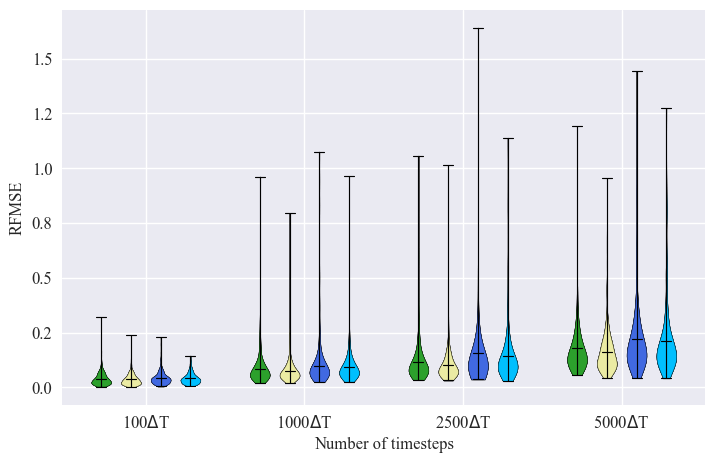

In [41]:
### Settings for plot ###
x_labels = [f"{length}$\Delta$T" for length in plot_lengths]
x = [4, 12, 20, 28]

log = False

ylim = [2 * 1e-3, 0.3 * 1e1] if log else [0, 2.1]

colors = ['#2ca02c', "#ececa3", '#4169E1', '#00BFFF']
alpha = 0.8

plt.style.use("seaborn")

### Violin plot ###
labels = []
def add_label(violin, label):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def set_color(violin, color):
    for pc in violin["bodies"]:
        pc.set_facecolor(color)
        pc.set_edgecolor(color)
        pc.set_alpha(alpha)

violins = []
fig, ax = plt.subplots(1, 1, figsize=fig_size)
for i in range(len(plot_lengths)):
    violins.append(ax.violinplot(L1_RFMSE_list, [x_ - 2.25 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(L1_swa_l1_RFMSE_list, [x_ -0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(L1_magnitude_pruning_RFMSE_list, [x_ + 0.75 for x_ in x], showmeans=True, showextrema=True, widths=1))
    violins.append(ax.violinplot(L1_swa_l1_magnitude_pruning_RFMSE_list, [x_ + 2.25 for x_ in x], showmeans=True, showextrema=True, widths=1))

for v, violin in enumerate(violins):
    violin["cbars"].set_color("black")
    violin["cbars"].set_linewidth(0.75)

    violin["cmins"].set_color("black")
    violin["cmins"].set_linewidth(0.75)

    violin["cmaxes"].set_color("black")
    violin["cmaxes"].set_linewidth(0.75)

    violin["cmeans"].set_color("black")
    violin["cmeans"].set_linewidth(0.75)

    for body in violin["bodies"]:
        body.set_alpha(alpha)
        body.set_facecolor(colors[v % 4])
        body.set_edgecolor("black")

    if v == 3:
        [add_label(violin, label) for violin, label in zip(violins, ["Dense", "L1", "Soft thresholding", "Magnitude pruning"])]


csfont = {'fontname':'Times New Roman'}
fs_ax = 12
ax.set_ylabel("RFMSE", fontsize=fs_ax,**csfont)
ax.set_xlabel("Number of timesteps", fontsize=fs_ax,**csfont)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=fs_ax,**csfont)
ax.set_yticklabels([f"{y:.1e}" if log else f"{y:.1f}" for y in ax.get_yticks()], fontsize=fs_ax,**csfont)

if log:
    ax.set_yscale("log")

plt.savefig("figures/L1/violine_l1_SWA.pdf", bbox_inches="tight")

In [29]:
# Load dense models:
with 